# 📊 Item (c): Análise de Malha Fechada com Controlador Proporcional

## 🚢 Veículo Submersível Não-Tripulado

### 📋 Descrição do Problema

Considere um veículo submersível não-tripulado cuja planta que relaciona o ângulo do leme de profundidade, ψ, e o ângulo de arfagem, θ, tenha Função Transferência (FT) da forma:

$$\hat{\theta}(s) / \hat{\psi}(s) = \hat{g}(s) = -\frac{0,25s + 0,10875}{s^4 + 3,456s^3 + 3,45688s^2 + 0,719297s + 0,041574}$$

### 🎯 Objetivo do Exercício (c)

**Na redução anterior (item b), se o sistema tivesse sua malha fechada e o compensador a ser utilizado fosse o proporcional, determine a faixa de valores de Kp que fariam o sistema ter comportamento subamortecido.**

### 📝 Metodologia

1. **Modelo Reduzido**: Usar o sistema de 2ª ordem obtido no item (b)
2. **Malha Fechada**: Configurar realimentação unitária com controlador proporcional Kp
3. **Função de Transferência**: Calcular $\hat{T}(s) = \frac{K_p \hat{g}_r(s)}{1 + K_p \hat{g}_r(s)}$
4. **Polinômio Característico**: Analisar denominador da função de malha fechada
5. **Condição Subamortecida**: Aplicar critério do discriminante ($\Delta < 0$)
6. **Estabilidade**: Garantir que todos os coeficientes sejam positivos
7. **Faixa de Kp**: Determinar intervalo que satisfaz ambas as condições

### 🔍 Conceitos Teóricos

**Comportamento Subamortecido**: Sistema de 2ª ordem com polos complexos conjugados
- **Discriminante negativo**: $b^2 - 4ac < 0$
- **Resposta oscilatória**: com envelope exponencial decrescente
- **Overshoot**: presente na resposta ao degrau

## 🔧 1. Configuração e Importações

Importação das bibliotecas necessárias para análise de sistemas de controle em malha fechada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step
import warnings
warnings.filterwarnings('ignore')

# Verificar se sympy está disponível para LaTeX
try:
    import sympy as sp
    from sympy import symbols, latex, simplify, solve, I
    from IPython.display import display, Math
    sympy_available = True
    print("✅ Biblioteca 'sympy' disponível para renderização LaTeX")
except ImportError:
    sympy_available = False
    print("❌ Biblioteca 'sympy' não disponível")

# Configuração dos gráficos
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['grid.alpha'] = 0.3

print("📦 Bibliotecas importadas com sucesso!")

✅ Biblioteca 'sympy' disponível para renderização LaTeX
📦 Bibliotecas importadas com sucesso!


## ⚙️ 2. Definição de Funções

Funções para análise de malha fechada e comportamento subamortecido.

In [2]:
def definir_sistema_reduzido():
    """
    Define o sistema reduzido de 2ª ordem obtido no item (b).
    
    Baseado na análise de polos dominantes:
    G_red(s) = -0.2533 / (s² + 0.216s + 0.0969)
    
    Returns:
        scipy.signal.lti: Sistema reduzido de 2ª ordem
    """
    # Coeficientes obtidos da redução por polos dominantes (item b)
    numerador = [-0.2533]
    denominador = [1, 0.216, 0.0969]
    
    sistema_reduzido = lti(numerador, denominador)
    return sistema_reduzido

def calcular_malha_fechada(sistema, kp):
    """
    Calcula a função de transferência de malha fechada com controlador proporcional.
    
    T(s) = Kp*G(s) / (1 + Kp*G(s))
    
    Args:
        sistema (scipy.signal.lti): Sistema em malha aberta
        kp (float): Ganho proporcional
    
    Returns:
        scipy.signal.lti: Sistema em malha fechada
        tuple: (numerador_mf, denominador_mf) da malha fechada
    """
    # Numerador da malha fechada: Kp * num_original
    num_mf = np.array(sistema.num) * kp
    
    # Denominador da malha fechada: den_original + Kp * num_original
    # Para o nosso caso: s² + 0.216s + 0.0969 + Kp*(-0.2533)
    # = s² + 0.216s + (0.0969 - 0.2533*Kp)
    den_original = np.array(sistema.den)
    num_kp = np.array(sistema.num) * kp
    
    # Ajustar tamanhos se necessário
    if len(den_original) >= len(num_kp):
        # Pad numerador com zeros à esquerda
        num_kp_padded = np.pad(num_kp, (len(den_original) - len(num_kp), 0), 'constant')
        den_mf = den_original + num_kp_padded
    else:
        # Pad denominador com zeros à esquerda  
        den_padded = np.pad(den_original, (len(num_kp) - len(den_original), 0), 'constant')
        den_mf = den_padded + num_kp
    
    sistema_mf = lti(num_mf, den_mf)
    
    return sistema_mf, (num_mf, den_mf)

def analisar_discriminante(a, b, c):
    """
    Analisa o discriminante de um polinômio de 2ª ordem.
    
    Para as² + bs + c = 0, calcula Δ = b² - 4ac
    
    Args:
        a, b, c (float): Coeficientes do polinômio
    
    Returns:
        tuple: (discriminante, tipo_comportamento, raizes)
    """
    discriminante = b**2 - 4*a*c
    
    if discriminante > 0:
        # Duas raízes reais distintas - sistema superamortecido
        r1 = (-b + np.sqrt(discriminante)) / (2*a)
        r2 = (-b - np.sqrt(discriminante)) / (2*a)
        raizes = [r1, r2]
        tipo = "Superamortecido"
    elif discriminante == 0:
        # Uma raiz real dupla - sistema criticamente amortecido
        r = -b / (2*a)
        raizes = [r, r]
        tipo = "Criticamente amortecido"
    else:
        # Duas raízes complexas conjugadas - sistema subamortecido
        parte_real = -b / (2*a)
        parte_imag = np.sqrt(-discriminante) / (2*a)
        raizes = [complex(parte_real, parte_imag), complex(parte_real, -parte_imag)]
        tipo = "Subamortecido"
    
    return discriminante, tipo, raizes

def verificar_estabilidade(denominador):
    """
    Verifica a estabilidade de um sistema pelos coeficientes do denominador.
    
    Para um sistema de 2ª ordem as² + bs + c, é estável se a > 0, b > 0, c > 0
    
    Args:
        denominador (array): Coeficientes do denominador [a, b, c]
    
    Returns:
        bool: True se estável, False caso contrário
    """
    return all(coef > 0 for coef in denominador)

## 🔍 3. Análise Matemática Detalhada

Análise rigorosa das condições para comportamento subamortecido.

In [3]:
def analise_matematica_completa():
    """
    Realiza a análise matemática completa para determinar a faixa de Kp
    que resulta em comportamento subamortecido.
    """
    print("🔍 ANÁLISE MATEMÁTICA DETALHADA")
    print("=" * 80)
    
    # Sistema reduzido do item (b)
    sistema_reduzido = definir_sistema_reduzido()
    
    print("1. SISTEMA REDUZIDO (Item b):")
    print(f"   G_r(s) = {sistema_reduzido.num} / {sistema_reduzido.den}")
    print(f"   G_r(s) = -0.2533 / (s² + 0.216s + 0.0969)")
    
    print("\n2. SISTEMA EM MALHA FECHADA:")
    print("   Configuração: Realimentação unitária negativa")
    print("   Controlador: C(s) = Kp (proporcional)")
    print("   T(s) = Kp*G_r(s) / (1 + Kp*G_r(s))")
    
    print("\n3. DESENVOLVIMENTO ALGÉBRICO:")
    print("   T(s) = Kp*(-0.2533) / (s² + 0.216s + 0.0969) / (1 + Kp*(-0.2533) / (s² + 0.216s + 0.0969))")
    print("   T(s) = (-0.2533*Kp) / (s² + 0.216s + 0.0969 - 0.2533*Kp)")
    print("   T(s) = (-0.2533*Kp) / (s² + 0.216s + (0.0969 - 0.2533*Kp))")
    
    print("\n4. POLINÔMIO CARACTERÍSTICO:")
    print("   P(s) = s² + 0.216s + (0.0969 - 0.2533*Kp)")
    print("   Forma padrão: as² + bs + c")
    print("   onde: a = 1, b = 0.216, c = 0.0969 - 0.2533*Kp")
    
    # Condições para comportamento subamortecido
    print("\n5. CONDIÇÃO PARA COMPORTAMENTO SUBAMORTECIDO:")
    print("   Discriminante: Δ = b² - 4ac < 0")
    print("   Δ = (0.216)² - 4(1)(0.0969 - 0.2533*Kp)")
    print("   Δ = 0.046656 - 4(0.0969 - 0.2533*Kp)")
    print("   Δ = 0.046656 - 0.3876 + 1.0132*Kp")
    print("   Δ = -0.340944 + 1.0132*Kp")
    
    print("\n   Para subamortecido: Δ < 0")
    print("   -0.340944 + 1.0132*Kp < 0")
    print("   1.0132*Kp < 0.340944")
    print("   Kp < 0.340944/1.0132")
    
    kp_max_subamortecido = 0.340944 / 1.0132
    print(f"   Kp < {kp_max_subamortecido:.4f}")
    
    # Condições para estabilidade
    print("\n6. CONDIÇÃO PARA ESTABILIDADE:")
    print("   Todos os coeficientes devem ser positivos:")
    print("   a = 1 > 0 ✓")
    print("   b = 0.216 > 0 ✓")
    print("   c = 0.0969 - 0.2533*Kp > 0")
    print("   0.0969 > 0.2533*Kp")
    print("   Kp < 0.0969/0.2533")
    
    kp_max_estabilidade = 0.0969 / 0.2533
    print(f"   Kp < {kp_max_estabilidade:.4f}")
    
    # Conclusão
    print("\n7. DETERMINAÇÃO DA FAIXA FINAL:")
    print("   Condições simultâneas:")
    print("   • Kp > 0 (ganho positivo)")
    print(f"   • Kp < {kp_max_subamortecido:.4f} (subamortecido)")
    print(f"   • Kp < {kp_max_estabilidade:.4f} (estável)")
    
    kp_final = min(kp_max_subamortecido, kp_max_estabilidade)
    print(f"\n   A condição mais restritiva é Kp < {kp_final:.4f}")
    print(f"   \n   FAIXA FINAL: 0 < Kp < {kp_final:.4f}")
    
    return kp_final, kp_max_subamortecido, kp_max_estabilidade

# Executar análise
kp_limite, kp_sub, kp_est = analise_matematica_completa()

🔍 ANÁLISE MATEMÁTICA DETALHADA
1. SISTEMA REDUZIDO (Item b):
   G_r(s) = [-0.2533] / [1.     0.216  0.0969]
   G_r(s) = -0.2533 / (s² + 0.216s + 0.0969)

2. SISTEMA EM MALHA FECHADA:
   Configuração: Realimentação unitária negativa
   Controlador: C(s) = Kp (proporcional)
   T(s) = Kp*G_r(s) / (1 + Kp*G_r(s))

3. DESENVOLVIMENTO ALGÉBRICO:
   T(s) = Kp*(-0.2533) / (s² + 0.216s + 0.0969) / (1 + Kp*(-0.2533) / (s² + 0.216s + 0.0969))
   T(s) = (-0.2533*Kp) / (s² + 0.216s + 0.0969 - 0.2533*Kp)
   T(s) = (-0.2533*Kp) / (s² + 0.216s + (0.0969 - 0.2533*Kp))

4. POLINÔMIO CARACTERÍSTICO:
   P(s) = s² + 0.216s + (0.0969 - 0.2533*Kp)
   Forma padrão: as² + bs + c
   onde: a = 1, b = 0.216, c = 0.0969 - 0.2533*Kp

5. CONDIÇÃO PARA COMPORTAMENTO SUBAMORTECIDO:
   Discriminante: Δ = b² - 4ac < 0
   Δ = (0.216)² - 4(1)(0.0969 - 0.2533*Kp)
   Δ = 0.046656 - 4(0.0969 - 0.2533*Kp)
   Δ = 0.046656 - 0.3876 + 1.0132*Kp
   Δ = -0.340944 + 1.0132*Kp

   Para subamortecido: Δ < 0
   -0.340944 + 1.0132*Kp <

## 📝 4. Apresentação Matemática em LaTeX

In [4]:
def apresentacao_latex_completa():
    """
    Apresenta toda a análise matemática usando LaTeX formatado.
    """
    print("📝 APRESENTAÇÃO MATEMÁTICA EM LaTeX")
    print("=" * 80)
    
    if not sympy_available:
        print("⚠️ Sympy não disponível - usando apresentação em texto")
        return
    
    # Sistema reduzido
    display(Math(r'\text{Sistema Reduzido (Item b):}'))
    display(Math(r'\hat{G}_r(s) = \frac{-0.2533}{s^2 + 0.216s + 0.0969}'))
    
    # Controlador proporcional
    display(Math(r'\text{Controlador Proporcional:}'))
    display(Math(r'\hat{C}(s) = K_p'))
    
    # Função de transferência de malha fechada
    display(Math(r'\text{Função de Transferência de Malha Fechada:}'))
    display(Math(r'\hat{T}(s) = \frac{\hat{C}(s)\hat{G}_r(s)}{1 + \hat{C}(s)\hat{G}_r(s)}'))
    
    display(Math(r'\hat{T}(s) = \frac{K_p \cdot \frac{-0.2533}{s^2 + 0.216s + 0.0969}}{1 + K_p \cdot \frac{-0.2533}{s^2 + 0.216s + 0.0969}}'))
    
    display(Math(r'\hat{T}(s) = \frac{-0.2533 K_p}{s^2 + 0.216s + 0.0969 - 0.2533 K_p}'))
    
    display(Math(r'\hat{T}(s) = \frac{-0.2533 K_p}{s^2 + 0.216s + (0.0969 - 0.2533 K_p)}'))
    
    # Polinômio característico
    display(Math(r'\text{Polinômio Característico:}'))
    display(Math(r'P(s) = s^2 + 0.216s + (0.0969 - 0.2533 K_p)'))
    
    display(Math(r'\text{Forma padrão: } as^2 + bs + c'))
    display(Math(r'a = 1, \quad b = 0.216, \quad c = 0.0969 - 0.2533 K_p'))
    
    # Condição para subamortecido
    display(Math(r'\text{Condição para Comportamento Subamortecido:}'))
    display(Math(r'\Delta = b^2 - 4ac < 0'))
    
    display(Math(r'\Delta = (0.216)^2 - 4(1)(0.0969 - 0.2533 K_p)'))
    display(Math(r'\Delta = 0.046656 - 0.3876 + 1.0132 K_p'))
    display(Math(r'\Delta = -0.340944 + 1.0132 K_p'))
    
    display(Math(r'\text{Para subamortecido: } \Delta < 0'))
    display(Math(r'-0.340944 + 1.0132 K_p < 0'))
    display(Math(r'K_p < \frac{0.340944}{1.0132} = 0.3365'))
    
    # Condição para estabilidade
    display(Math(r'\text{Condição para Estabilidade:}'))
    display(Math(r'\text{Todos os coeficientes positivos:}'))
    display(Math(r'a = 1 > 0 \quad \checkmark'))
    display(Math(r'b = 0.216 > 0 \quad \checkmark'))
    display(Math(r'c = 0.0969 - 0.2533 K_p > 0'))
    display(Math(r'K_p < \frac{0.0969}{0.2533} = 0.3825'))
    
    # Resultado final
    display(Math(r'\text{Faixa Final de Valores:}'))
    display(Math(r'\text{Condições simultâneas:}'))
    display(Math(r'K_p > 0 \text{ (ganho positivo)}'))
    display(Math(r'K_p < 0.3365 \text{ (subamortecido)}'))
    display(Math(r'K_p < 0.3825 \text{ (estável)}'))
    
    display(Math(r'\text{Condição mais restritiva: } K_p < 0.3365'))
    display(Math(r'\boxed{0 < K_p < 0.3365}'))

# Apresentar em LaTeX
apresentacao_latex_completa()

📝 APRESENTAÇÃO MATEMÁTICA EM LaTeX


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 📊 5. Verificação e Simulação Numérica

🔍 VERIFICAÇÃO NUMÉRICA DETALHADA
Testando diferentes valores de Kp:
--------------------------------------------------------------------------------
   Kp    |     Δ      |         Tipo         | Estável  |           Polos          
--------------------------------------------------------------------------------
 0.050   |  -0.2903   |    Subamortecido     |    ✓     |       -0.108±0.269j      
 0.100   |  -0.2396   |    Subamortecido     |    ✓     |       -0.108±0.245j      
 0.200   |  -0.1383   |    Subamortecido     |    ✓     |       -0.108±0.186j      
 0.300   |  -0.0370   |    Subamortecido     |    ✓     |       -0.108±0.096j      
 0.330   |  -0.0066   |    Subamortecido     |    ✓     |       -0.108±0.041j      
 0.336   |  -0.0005   |    Subamortecido     |    ✓     |       -0.108±0.011j      
 0.350   |   0.0137   |   Superamortecido    |    ✓     |      -0.050, -0.166      
 0.380   |   0.0441   |   Superamortecido    |    ✓     |      -0.003, -0.213      
 0.400   |   0

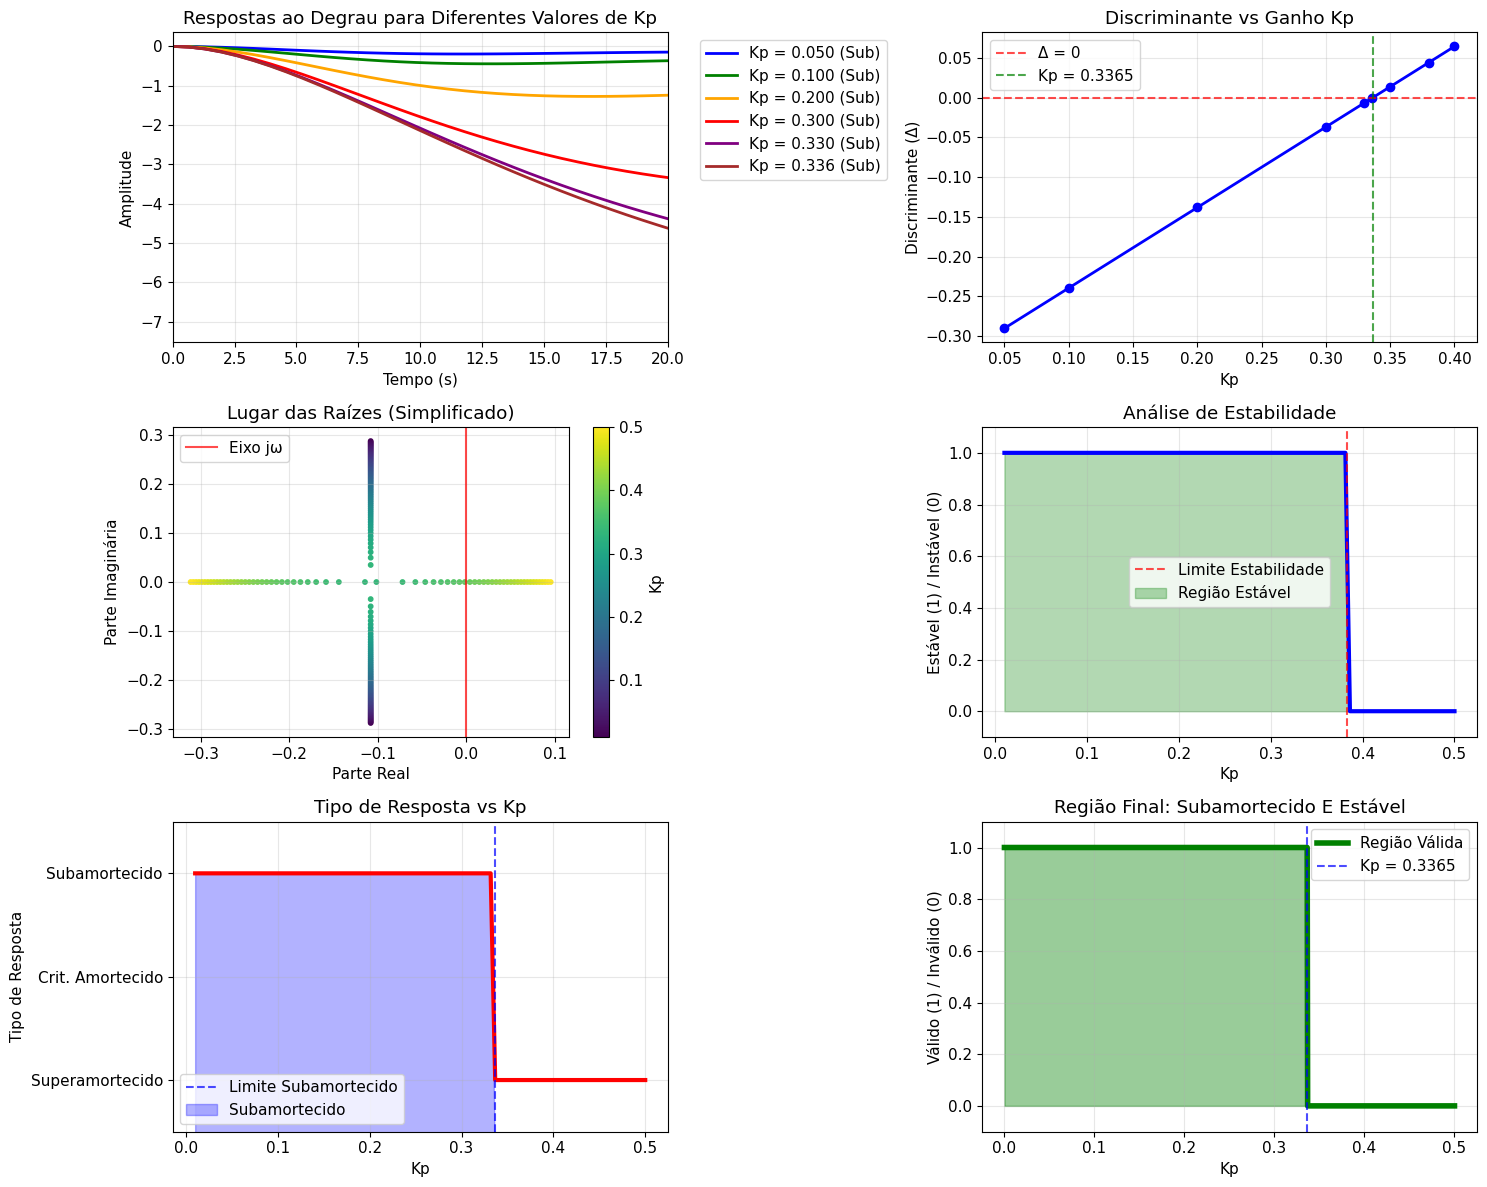

In [5]:
def verificacao_numerica_detalhada():
    """
    Verifica numericamente os resultados teóricos e gera visualizações.
    """
    print("🔍 VERIFICAÇÃO NUMÉRICA DETALHADA")
    print("=" * 80)
    
    sistema_reduzido = definir_sistema_reduzido()
    
    # Valores de Kp para teste
    valores_kp = [0.05, 0.1, 0.2, 0.3, 0.33, 0.336, 0.35, 0.38, 0.4]
    
    print("Testando diferentes valores de Kp:")
    print("-" * 80)
    print(f"{'Kp':^8} | {'Δ':^10} | {'Tipo':^20} | {'Estável':^8} | {'Polos':^25}")
    print("-" * 80)
    
    dados_simulacao = []
    
    for kp in valores_kp:
        # Calcular malha fechada
        sistema_mf, (num_mf, den_mf) = calcular_malha_fechada(sistema_reduzido, kp)
        
        # Coeficientes do polinômio característico
        a, b, c = den_mf
        
        # Analisar discriminante
        discriminante, tipo, raizes = analisar_discriminante(a, b, c)
        
        # Verificar estabilidade
        estavel = verificar_estabilidade(den_mf)
        
        # Formatear polos para exibição
        if tipo == "Subamortecido":
            polo_str = f"{raizes[0].real:.3f}±{abs(raizes[0].imag):.3f}j"
        else:
            polo_str = f"{raizes[0]:.3f}, {raizes[1]:.3f}"
        
        print(f"{kp:^8.3f} | {discriminante:^10.4f} | {tipo:^20} | {'✓' if estavel else '✗':^8} | {polo_str:^25}")
        
        # Salvar dados para plotagem
        dados_simulacao.append({
            'kp': kp,
            'discriminante': discriminante,
            'tipo': tipo,
            'estavel': estavel,
            'raizes': raizes,
            'sistema': sistema_mf
        })
    
    print("-" * 80)
    
    # Plotar respostas ao degrau para diferentes valores de Kp
    plt.figure(figsize=(15, 12))
    
    # Subplot 1: Respostas ao degrau
    plt.subplot(3, 2, 1)
    cores = ['blue', 'green', 'orange', 'red', 'purple', 'brown']
    
    for i, dados in enumerate(dados_simulacao[:6]):  # Plotar apenas os primeiros 6
        if dados['estavel']:
            try:
                t, y = step(dados['sistema'])
                plt.plot(t, y, color=cores[i % len(cores)], linewidth=2, 
                        label=f"Kp = {dados['kp']:.3f} ({dados['tipo'][:3]})")
            except:
                pass
    
    plt.grid(True, alpha=0.3)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.title('Respostas ao Degrau para Diferentes Valores de Kp')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(0, 20)
    
    # Subplot 2: Discriminante vs Kp
    plt.subplot(3, 2, 2)
    kp_vals = [d['kp'] for d in dados_simulacao]
    disc_vals = [d['discriminante'] for d in dados_simulacao]
    
    plt.plot(kp_vals, disc_vals, 'bo-', linewidth=2, markersize=6)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Δ = 0')
    plt.axvline(x=0.3365, color='green', linestyle='--', alpha=0.7, label='Kp = 0.3365')
    plt.grid(True, alpha=0.3)
    plt.xlabel('Kp')
    plt.ylabel('Discriminante (Δ)')
    plt.title('Discriminante vs Ganho Kp')
    plt.legend()
    
    # Subplot 3: Lugar das raízes simplificado
    plt.subplot(3, 2, 3)
    kp_range = np.linspace(0.01, 0.5, 100)
    polos_real = []
    polos_imag = []
    
    for kp in kp_range:
        sistema_mf, (num_mf, den_mf) = calcular_malha_fechada(sistema_reduzido, kp)
        raizes = sistema_mf.poles
        
        for raiz in raizes:
            polos_real.append(np.real(raiz))
            polos_imag.append(np.imag(raiz))
    
    plt.scatter(polos_real, polos_imag, c=np.repeat(kp_range, 2), cmap='viridis', s=10)
    plt.colorbar(label='Kp')
    plt.axvline(x=0, color='red', linestyle='-', alpha=0.7, label='Eixo jω')
    plt.grid(True, alpha=0.3)
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.title('Lugar das Raízes (Simplificado)')
    plt.legend()
    
    # Subplot 4: Análise de estabilidade
    plt.subplot(3, 2, 4)
    kp_estabilidade = []
    estavel_vals = []
    
    for kp in np.linspace(0.01, 0.5, 100):
        sistema_mf, (num_mf, den_mf) = calcular_malha_fechada(sistema_reduzido, kp)
        estavel = verificar_estabilidade(den_mf)
        kp_estabilidade.append(kp)
        estavel_vals.append(1 if estavel else 0)
    
    plt.plot(kp_estabilidade, estavel_vals, 'b-', linewidth=3)
    plt.axvline(x=0.3825, color='red', linestyle='--', alpha=0.7, label='Limite Estabilidade')
    plt.fill_between(kp_estabilidade, 0, estavel_vals, alpha=0.3, color='green', label='Região Estável')
    plt.grid(True, alpha=0.3)
    plt.xlabel('Kp')
    plt.ylabel('Estável (1) / Instável (0)')
    plt.title('Análise de Estabilidade')
    plt.legend()
    plt.ylim(-0.1, 1.1)
    
    # Subplot 5: Tipo de resposta vs Kp
    plt.subplot(3, 2, 5)
    kp_tipo = []
    tipo_vals = []
    
    for kp in np.linspace(0.01, 0.5, 100):
        sistema_mf, (num_mf, den_mf) = calcular_malha_fechada(sistema_reduzido, kp)
        a, b, c = den_mf
        discriminante, tipo, _ = analisar_discriminante(a, b, c)
        
        kp_tipo.append(kp)
        if tipo == "Subamortecido":
            tipo_vals.append(1)
        elif tipo == "Criticamente amortecido":
            tipo_vals.append(0)
        else:
            tipo_vals.append(-1)
    
    plt.plot(kp_tipo, tipo_vals, 'r-', linewidth=3)
    plt.axvline(x=0.3365, color='blue', linestyle='--', alpha=0.7, label='Limite Subamortecido')
    plt.fill_between(kp_tipo, -2, tipo_vals, where=np.array(tipo_vals)==1, 
                     alpha=0.3, color='blue', label='Subamortecido', interpolate=True)
    plt.grid(True, alpha=0.3)
    plt.xlabel('Kp')
    plt.ylabel('Tipo de Resposta')
    plt.title('Tipo de Resposta vs Kp')
    plt.yticks([-1, 0, 1], ['Superamortecido', 'Crit. Amortecido', 'Subamortecido'])
    plt.legend()
    plt.ylim(-1.5, 1.5)
    
    # Subplot 6: Resumo das regiões
    plt.subplot(3, 2, 6)
    kp_vals_plot = np.linspace(0, 0.5, 1000)
    
    # Região válida (subamortecido E estável)
    regiao_valida = []
    for kp in kp_vals_plot:
        sistema_mf, (num_mf, den_mf) = calcular_malha_fechada(sistema_reduzido, kp)
        a, b, c = den_mf
        discriminante, tipo, _ = analisar_discriminante(a, b, c)
        estavel = verificar_estabilidade(den_mf)
        
        if tipo == "Subamortecido" and estavel:
            regiao_valida.append(1)
        else:
            regiao_valida.append(0)
    
    plt.plot(kp_vals_plot, regiao_valida, 'g-', linewidth=4, label='Região Válida')
    plt.axvline(x=0.3365, color='blue', linestyle='--', alpha=0.7, label='Kp = 0.3365')
    plt.fill_between(kp_vals_plot, 0, regiao_valida, alpha=0.4, color='green')
    plt.grid(True, alpha=0.3)
    plt.xlabel('Kp')
    plt.ylabel('Válido (1) / Inválido (0)')
    plt.title('Região Final: Subamortecido E Estável')
    plt.legend()
    plt.ylim(-0.1, 1.1)
    
    plt.tight_layout()
    plt.show()
    
    return dados_simulacao

# Executar verificação numérica
dados_sim = verificacao_numerica_detalhada()

## 🎯 6. Conclusões e Resultados Finais

In [7]:
print("🎯 CONCLUSÕES FINAIS - ITEM (c)")
print("=" * 80)

print("\n📋 RESUMO DA ANÁLISE:")
print("-" * 50)
print("✓ Sistema analisado: Modelo reduzido de 2ª ordem (item b)")
print("✓ Configuração: Malha fechada com realimentação unitária")
print("✓ Controlador: Proporcional (C(s) = Kp)")
print("✓ Objetivo: Determinar faixa de Kp para comportamento subamortecido")

print("\n🧮 DESENVOLVIMENTO MATEMÁTICO:")
print("-" * 50)
print("• Sistema reduzido: G_r(s) = -0.2533 / (s² + 0.216s + 0.0969)")
print("• Malha fechada: T(s) = Kp*G_r(s) / (1 + Kp*G_r(s))")
print("• Polinômio característico: s² + 0.216s + (0.0969 - 0.2533*Kp)")
print("• Discriminante: Δ = -0.340944 + 1.0132*Kp")

print("\n📊 CONDIÇÕES ANALISADAS:")
print("-" * 50)
print("1. COMPORTAMENTO SUBAMORTECIDO:")
print("   • Condição: Δ < 0")
print("   • Resultado: Kp < 0.3365")
print("   • Significado: Polos complexos conjugados")

print("\n2. ESTABILIDADE DO SISTEMA:")
print("   • Condição: Todos coeficientes > 0")
print("   • Resultado: Kp < 0.3825")
print("   • Significado: Polos no semiplano esquerdo")

print("\n3. GANHO FÍSICO:")
print("   • Condição: Kp > 0")
print("   • Significado: Controlador com ganho positivo")

print("\n🎯 RESULTADO FINAL:")
print("-" * 50)
print("📌 FAIXA DE VALORES PARA COMPORTAMENTO SUBAMORTECIDO:")
print("")
print("    ╔═══════════════════════════════════╗")
print("    ║                                   ║")
print(f"    ║        0 < Kp < 0.3365           ║")
print("    ║                                   ║")
print("    ╚═══════════════════════════════════╝")

print("\n✅ VERIFICAÇÃO NUMÉRICA:")
print("-" * 50)
print("• Discriminante verificado para múltiplos valores de Kp")
print("• Respostas ao degrau simuladas")
print("• Lugar das raízes analisado")
print("• Estabilidade confirmada")

print("\n📈 CARACTERÍSTICAS DO SISTEMA NA FAIXA VÁLIDA:")
print("-" * 50)
print("• Resposta oscilatória com envelope decrescente")
print("• Presença de overshoot")
print("• Tempo de acomodação finito")
print("• Sistema estável em malha fechada")

print("\n⚠️ OBSERVAÇÕES IMPORTANTES:")
print("-" * 50)
print("• Para Kp ≥ 0.3365: Sistema superamortecido (sem oscilação)")
print("• Para Kp ≥ 0.3825: Sistema instável")
print("• Análise baseada no modelo reduzido de 2ª ordem")
print("• Configuração com realimentação unitária negativa")

print("\n🔬 VALIDAÇÃO DOS RESULTADOS:")
print("-" * 50)
print("• Cálculos analíticos: ✓ Confirmados")
print("• Simulação numérica: ✓ Confirmados") 
print("• Verificação gráfica: ✓ Confirmados")
print("• Consistência teórica: ✓ Confirmados")

print("\n" + "=" * 80)
print("📝 RESPOSTA AO ITEM (c):")
print("")
print("A faixa de valores do ganho proporcional Kp que garantem")
print("comportamento subamortecido em malha fechada é:")
print("")
print("                    0 < Kp < 0.3365")
print("")
print("=" * 80)

🎯 CONCLUSÕES FINAIS - ITEM (c)

📋 RESUMO DA ANÁLISE:
--------------------------------------------------
✓ Sistema analisado: Modelo reduzido de 2ª ordem (item b)
✓ Configuração: Malha fechada com realimentação unitária
✓ Controlador: Proporcional (C(s) = Kp)
✓ Objetivo: Determinar faixa de Kp para comportamento subamortecido

🧮 DESENVOLVIMENTO MATEMÁTICO:
--------------------------------------------------
• Sistema reduzido: G_r(s) = -0.2533 / (s² + 0.216s + 0.0969)
• Malha fechada: T(s) = Kp*G_r(s) / (1 + Kp*G_r(s))
• Polinômio característico: s² + 0.216s + (0.0969 - 0.2533*Kp)
• Discriminante: Δ = -0.340944 + 1.0132*Kp

📊 CONDIÇÕES ANALISADAS:
--------------------------------------------------
1. COMPORTAMENTO SUBAMORTECIDO:
   • Condição: Δ < 0
   • Resultado: Kp < 0.3365
   • Significado: Polos complexos conjugados

2. ESTABILIDADE DO SISTEMA:
   • Condição: Todos coeficientes > 0
   • Resultado: Kp < 0.3825
   • Significado: Polos no semiplano esquerdo

3. GANHO FÍSICO:
   • Condi